In [7]:
import config as cfg
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from utility.plot import load_tf_color

matplotlib_style = 'default'
import matplotlib.pyplot as plt; plt.style.use(matplotlib_style)
plt.rcParams.update({'axes.labelsize': 'medium',
                     'axes.titlesize': 'medium',
                     'font.size': 14.0,
                     'text.usetex': True,
                     'text.latex.preamble': r'\usepackage{amsfonts} \usepackage{bm}'})

TFColor = load_tf_color()
date_cols = ['Visit_Date', 'Date of death', 'ALSFRS_Date', 'SymptomOnset_Date']
df_calsnic = pd.read_csv(Path.joinpath(cfg.CALSNIC_DATA_DIR, 'calsnic_processed.csv'), index_col=0, parse_dates=date_cols)
event_names = ['Speech', 'Swallowing', 'Handwriting', 'Walking']
for event_name in event_names:
    df_calsnic = df_calsnic.loc[(df_calsnic[f'TTE_{event_name}'] > 0) & (df_calsnic[f'TTE_{event_name}'] <= 365)] # 1 - 365

In [8]:
df_proact = pd.read_csv(Path.joinpath(cfg.PROACT_DATA_DIR, 'proact_processed.csv'), index_col=0)
event_names = ['Speech', 'Swallowing', 'Handwriting', 'Walking']
for event_name in event_names:
    df_proact = df_proact.loc[(df_proact[f'Event_{event_name}'] == 0) | (df_proact[f'Event_{event_name}'] == 1)] # drop left-censored
    df_proact = df_proact.loc[(df_proact[f'TTE_{event_name}'] > 0) & (df_proact[f'TTE_{event_name}'] <= 365)] # 1 - 365
df_proact = df_proact.drop(df_proact.filter(like='_Strength').columns, axis=1) # Drop strength tests
df_proact = df_proact.drop('Race_Caucasian', axis=1) # Drop race information
df_proact = df_proact.drop('El_escorial', axis=1) # Drop el_escorial
df_proact = df_proact.drop(['Height', 'Weight', 'BMI'], axis=1) # Drop height/weight/bmi

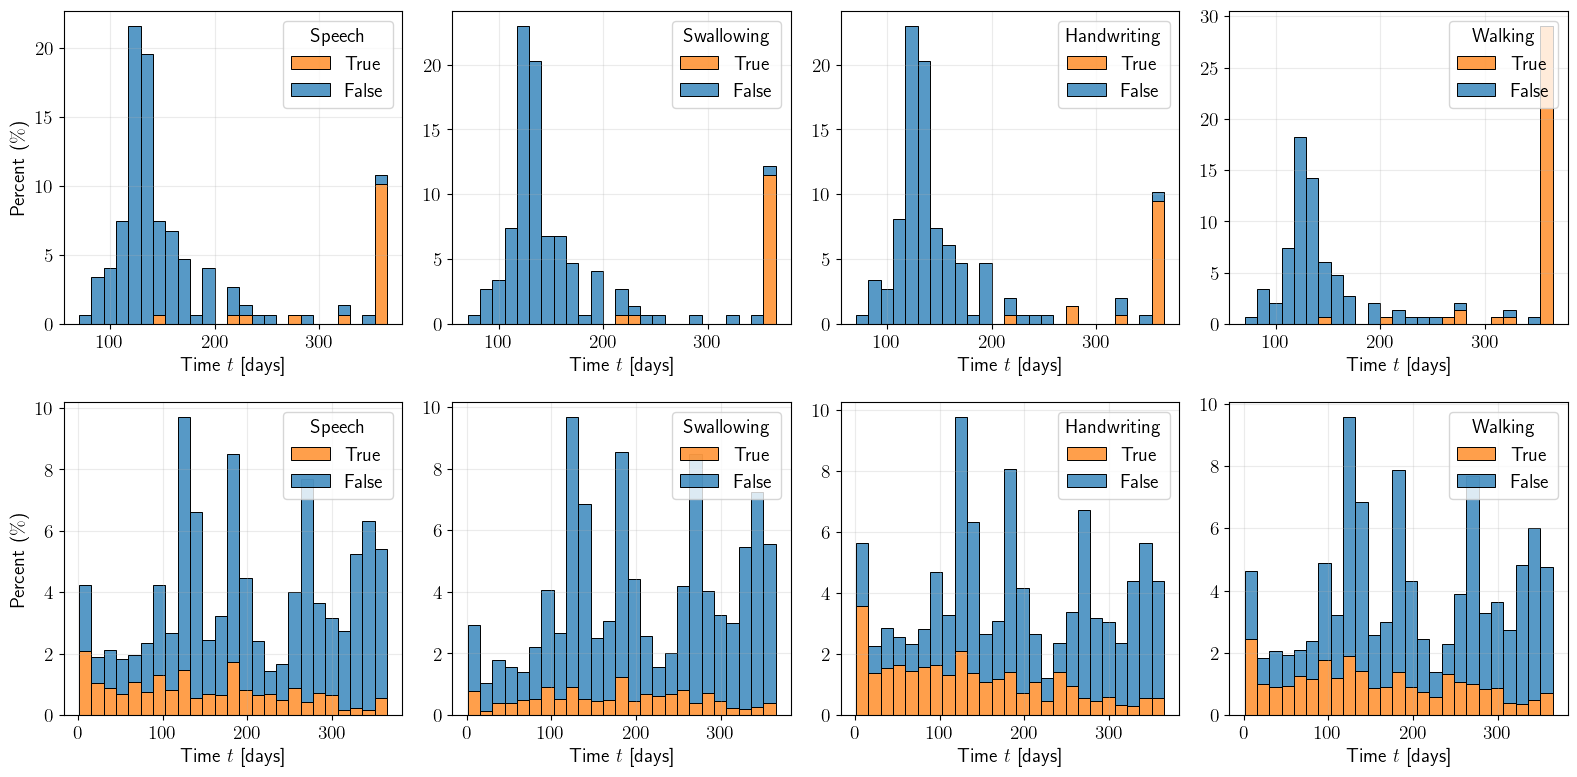

In [9]:
# Plot event distribution
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(16, 8))
axs = axs.flatten()

for i, col in enumerate(event_names):  # First four events for df_calnisc
    event = df_calsnic[[f'TTE_{col}', f'Event_{col}']]
    sns.histplot(x=f'TTE_{col}', data=event, hue=f'Event_{col}',
                 multiple="stack", bins=25, ax=axs[i], stat="percent")
    axs[i].set_xlabel("Time $t$ [days]")
    if i == 0:
        axs[i].set_ylabel("Percent ($\%$)")
    else:
        axs[i].set_ylabel("")
    axs[i].grid(True, alpha=0.25)
    axs[i].legend(title=col, loc='upper right', labels=["True", "False"])

# Plot for df_proact
for i, col in enumerate(event_names):  # Next four events for df_proact
    event = df_proact[[f'TTE_{col}', f'Event_{col}']]
    sns.histplot(x=f'TTE_{col}', data=event, hue=f'Event_{col}',
                 multiple="stack", bins=25, ax=axs[i + 4], stat="percent")
    axs[i + 4].set_xlabel("Time $t$ [days]")
    if i == 0:
        axs[i + 4].set_ylabel("Percent ($\%$)")
    else:
        axs[i + 4].set_ylabel("")
    axs[i + 4].grid(True, alpha=0.25)
    axs[i + 4].legend(title=col, loc='upper right', labels=["True", "False"])

plt.tight_layout()
plt.savefig(f"{cfg.PLOTS_DIR}/event_distribution.pdf", format='pdf', bbox_inches='tight')
plt.show()